In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/Princee Kabra/Downloads/datasets_951_1740_cars.csv")

In [3]:
print(data)

      mpg  cubicinches   cylinders   hp  weightlbs   time-to-60   year  \
0    14.0          350           8  165       4209           12   1972   
1    31.9           89           4   71       1925           14   1980   
2    17.0          302           8  140       3449           11   1971   
3    15.0          400           8  150       3761           10   1971   
4    30.5           98           4   63       2051           17   1978   
..    ...          ...         ...  ...        ...          ...    ...   
256  17.0          305           8  130       3840           15   1980   
257  36.1           91           4   60       1800           16   1979   
258  22.0          232           6  112       2835           15   1983   
259  18.0          232           6  100       3288           16   1972   
260  22.0          250           6  105       3353           15   1977   

        brand  
0         US.  
1     Europe.  
2         US.  
3         US.  
4         US.  
..        ...  

In [3]:
x=data.iloc[:,:-1].values

In [4]:
x=pd.DataFrame(x)

In [5]:
x= x.apply(pd.to_numeric,errors='coerce') # convert all columns of DataFrame


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x)
x=imputer.transform(x)

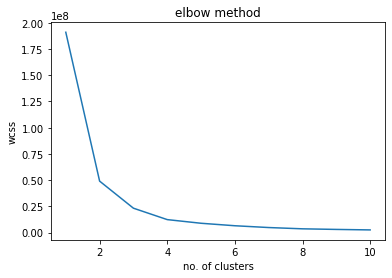

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)    
plt.title('elbow method') 
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [10]:
x=np.array(x)

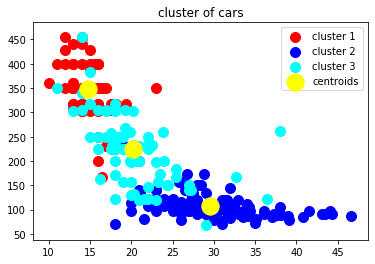

In [14]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='cyan',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.legend()
plt.title('cluster of cars')
plt.show()